# Ridge Regression

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

In [2]:
data_file = "Hitters.csv"

In [3]:
df = pd.read_csv(data_file).dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [4]:
x64 = df.drop(["Salary", "League", "Division", "NewLeague"], axis=1).astype("float64")
y = df["Salary"]
dummies = pd.get_dummies(df[["League", "Division", "NewLeague"]])
X = pd.concat([x64, dummies[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3232)
ridge_model = Ridge(alpha=0.1).fit(X_train, y_train)
ridge_model.coef_

array([-1.51535604e+00,  5.37454624e+00,  2.53388727e+00, -2.68029351e-01,
       -7.65669314e-01,  3.63976611e+00, -7.76997148e-02, -5.17995129e-01,
        1.67029765e+00,  1.57911617e+00,  9.39683946e-01, -5.64388298e-02,
       -2.88096148e-01,  2.67776011e-01,  3.00562601e-01, -3.09604280e+00,
        9.22344468e+01, -9.39645735e+01, -2.55763492e+01])

Text(0, 0.5, 'Katsayi')

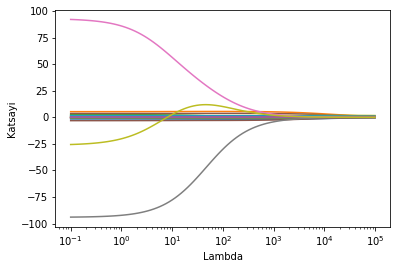

In [9]:
lambdalar = 10 ** (np.linspace(10, -2, 100)/2)
ridge_model = Ridge()
katsayilar = []

for lambdaa in lambdalar:
    ridge_model.set_params(alpha=lambdaa)
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)
    
gca = plt.gca()
gca.plot(lambdalar, katsayilar)
gca.set_xscale("log")
plt.xlabel("Lambda")
plt.ylabel("Katsayi")

# Tahmin

In [12]:
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

352.28886214626914

# Model Tuning

In [17]:
ridge_cv = RidgeCV(alphas=lambdalar, scoring="neg_mean_squared_error", normalize=True)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.alpha_)

0.1


/Users/alperkaraca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [18]:
ridge_tuned = Ridge(alpha=ridge_cv.alpha_, normalize=True).fit(X_train, y_train)
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

/Users/alperkaraca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


300.24635175886255